In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv("/content/drive/MyDrive/Project /ML/Algerian_forest_fires_dataset_UPDATE.csv", header = 1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [36]:
df.shape

(246, 14)

# Data cleaning

## Handling missing value

In [34]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
RH             1
Ws             1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [53]:
df[df.isnull().any(axis = 1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [56]:
df.dropna( axis = 0, inplace= True )

In [57]:
df.loc[121:124]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


In [58]:
df.reset_index(drop = True, inplace = True)

In [59]:
df.loc[121:124]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
124,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire


In [60]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

## New column for region

0 = Bejaia Region
1 = Sidi-Bel Abbes

In [61]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [62]:
df.columns = df.columns.str.strip()
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [67]:
df[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
123,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
124,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
125,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire


In [68]:
df.reset_index( drop = True, inplace = True )

In [69]:
df[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire


In [70]:
df.loc[:122, "Region"] = 0
df.loc[122:, "Region"] = 1

In [71]:
df[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0.0
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0.0
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1.0
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1.0


## Converting columns to proper type

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    object 
 1   month        243 non-null    object 
 2   year         243 non-null    object 
 3   Temperature  243 non-null    object 
 4   RH           243 non-null    object 
 5   Ws           243 non-null    object 
 6   Rain         243 non-null    object 
 7   FFMC         243 non-null    object 
 8   DMC          243 non-null    object 
 9   DC           243 non-null    object 
 10  ISI          243 non-null    object 
 11  BUI          243 non-null    object 
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.6+ KB


In [73]:
df["Region"] = df["Region"].astype(int)

In [74]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [75]:
integer = ['day', 'month', 'year', 'Temperature', 'RH', 'Ws']

In [79]:
df[integer] = df[integer].astype(int)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [81]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [82]:
objects = [ feature for feature in df.columns if df[feature].dtypes == "O" ]
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [83]:
for feature in objects:
    if feature != "Classes":
        df[feature] = df[feature].astype(float)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


## Encoding Classes

In [86]:
df["Classes"].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [89]:
df["Classes"] = np.where( df["Classes"].str.contains("not fire"), 0 , 1 )

In [90]:
df["Classes"].unique()

array([0, 1])

In [91]:
#df.to_csv("algerian_fire_cleaned.csv")

In [547]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("algerian_fire_cleaned.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


# EDA

In [98]:
#percentage of pie chart
percentage = df["Classes"].value_counts(normalize =True)

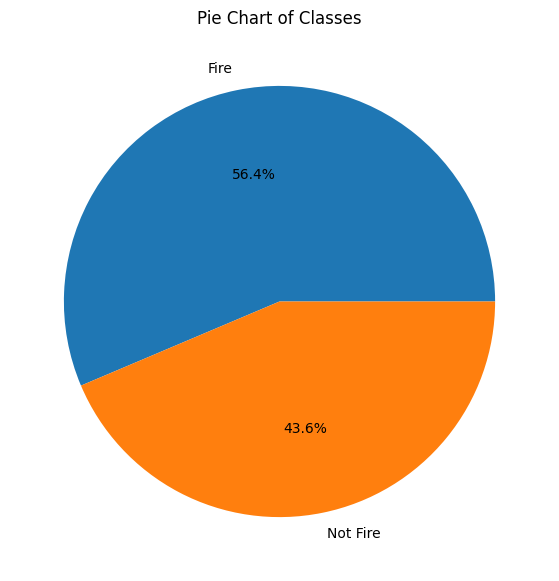

In [99]:
# plotting piechart
classlabels=["Fire","Not Fire"]
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title("Pie Chart of Classes")
plt.show()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    int64  
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(8)
memory usage: 28.6 KB


In [548]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [20]:
df["year"].unique()

array([2012], dtype=int64)

In [21]:
df["month"].unique()

array([6, 7, 8, 9], dtype=int64)

In [22]:
df["day"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

# Correlation

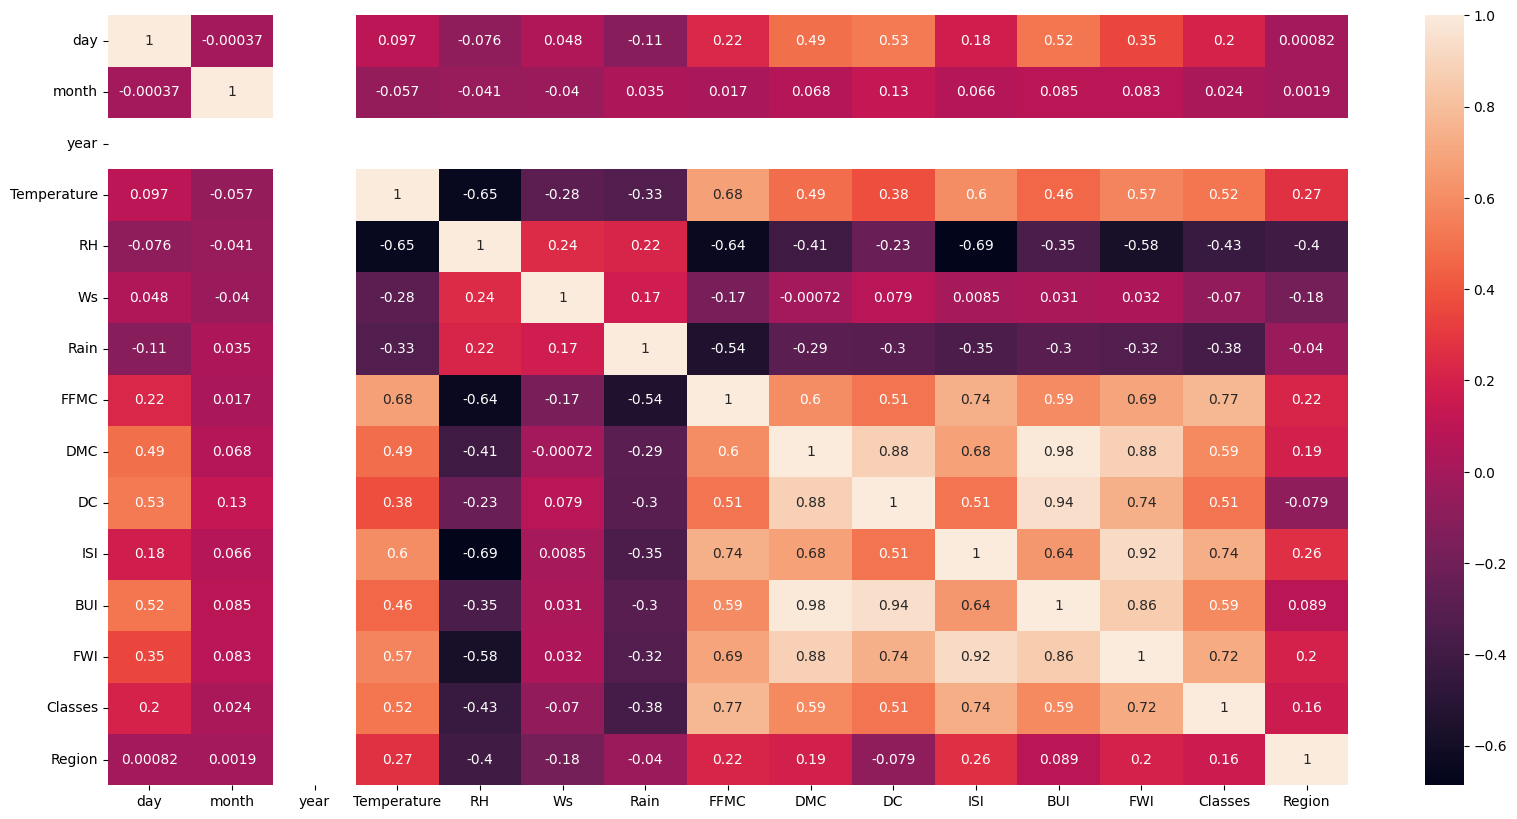

In [549]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [475]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [479]:
## threshold--Domain expertise
corr_features=correlation(X_train,0.85)
corr_features

{'BUI', 'DC', 'FWI'}

In [550]:
df_copy = df.drop(columns = ["BUI", "FWI"] )

# Feature selection

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot

In [481]:
# feature selection
def select_numericals_reg(X_train, y_train, X_test, k):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k = k)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

def select_numericals_mutual(X_train, y_train, X_test, k):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_regression, k = k )
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs


In [551]:
df_copy.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'Classes', 'Region'],
      dtype='object')

In [552]:
num_data = df_copy[['RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI']]
cat_data = df_copy[["month","Classes", "Region"]]
y = df_copy["Temperature"]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(num_data, y, test_size=0.33)

#### visualization of best features

Feature RH: 135.669498
Feature Ws: 20.255630
Feature Rain: 38.017112
Feature FFMC: 186.719277
Feature DMC: 48.726284
Feature DC: 23.267537
Feature ISI: 94.757061


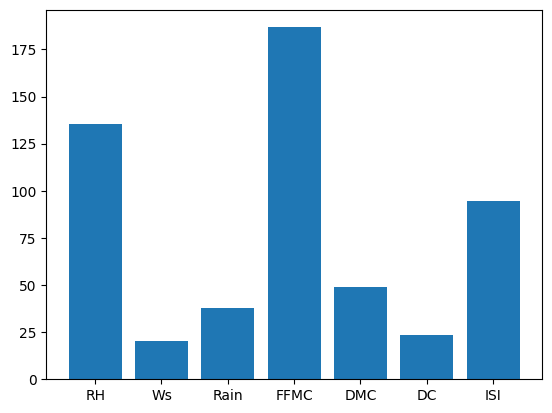

In [517]:
# feature selection
X_train_fs, X_test_fs, fs = select_numericals_reg(X_train, y_train, X_test, "all")

# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %s: %f' % (fs.feature_names_in_[i], fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.xticks(range(len(fs.scores_)), fs.feature_names_in_)
pyplot.show()

Feature RH: 0.310966
Feature Ws: 0.106505
Feature Rain: 0.108323
Feature FFMC: 0.485575
Feature DMC: 0.385479
Feature DC: 0.246762
Feature ISI: 0.491873


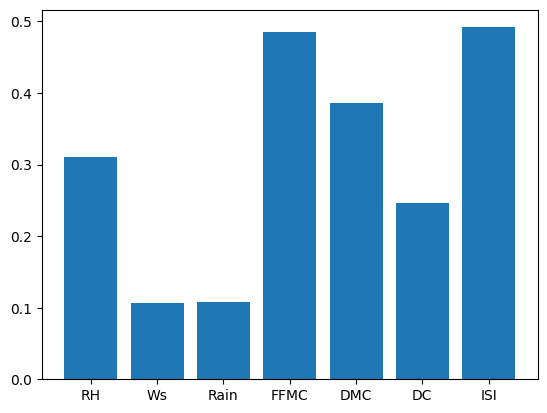

In [518]:
# feature selection
X_train_fs, X_test_fs, fs = select_numericals_mutual(X_train, y_train, X_test, "all")

# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %s: %f' % (fs.feature_names_in_[i], fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.xticks(range(len(fs.scores_)), fs.feature_names_in_)
pyplot.show()

### Select best parameter k for number of features

>3 -1.983000 (0.397023)
>4 -1.930444 (0.389066)
>5 -1.943807 (0.398835)
>6 -1.963577 (0.396170)
>7 -1.976116 (0.413206)


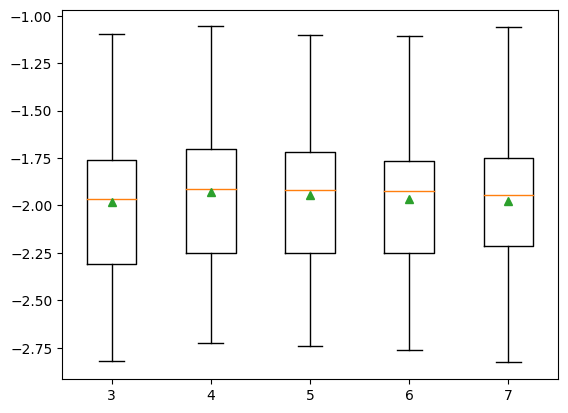

In [553]:
# define number of features to evaluate
num_features = [3,4,5,6,7]
# enumerate each number of features
results = list()
for k in num_features:
    # create pipeline
    model = LinearRegression()
    X_train_fs, X_test_fs, fs = select_numericals_reg(X_train, y_train, X_test, k)
    pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
    # evaluate the model
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X_train_fs, y_train, scoring='neg_mean_absolute_error', cv=cv,n_jobs=-1)
    results.append(scores)
    # summarize the results
    print('>%d %f (%f)' % (k, np.mean(scores), np.std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=num_features, showmeans=True)
pyplot.show()

>3 -2.111382 (0.388660)
>4 -1.930444 (0.389066)
>5 -1.943807 (0.398835)
>6 -1.963577 (0.396170)
>7 -1.976116 (0.413206)


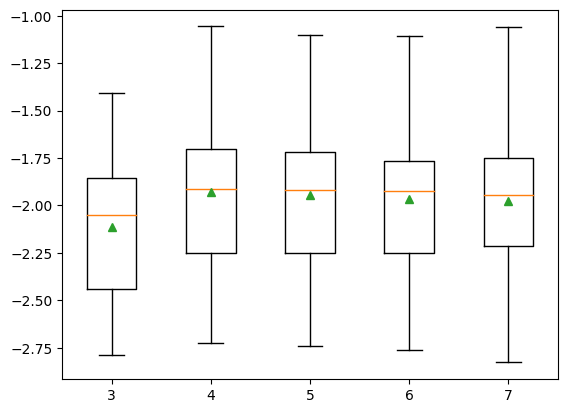

In [554]:
# define number of features to evaluate
num_features = [3,4,5,6,7]
# enumerate each number of features
results = list()
for k in num_features:
    # create pipeline
    model = LinearRegression()
    X_train_fs, X_test_fs, fs = select_numericals_mutual(X_train, y_train, X_test, k)
    pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
    # evaluate the model
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X_train_fs, y_train, scoring='neg_mean_absolute_error', cv=cv,n_jobs=-1)
    results.append(scores)
    # summarize the results
    print('>%d %f (%f)' % (k, np.mean(scores), np.std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=num_features, showmeans=True)
pyplot.show()

# Model training

### Feature scaling or standardization

In [333]:
from sklearn.preprocessing import StandardScaler

def scaling(X_train, X_test):
    scaler=StandardScaler()
    X_train_scaled=scaler.fit_transform(X_train_fs)
    X_test_scaled=scaler.transform(X_test_fs)    
    return X_train_scaled, X_test_scaled

In [334]:
X_train_fs, X_test_fs, fs = select_numericals_mutual(X_train, y_train, X_test, k = 4)

C:\Users\caesa\AppData\Local\Temp\ipykernel_6768\3463273028.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train After Scaling')

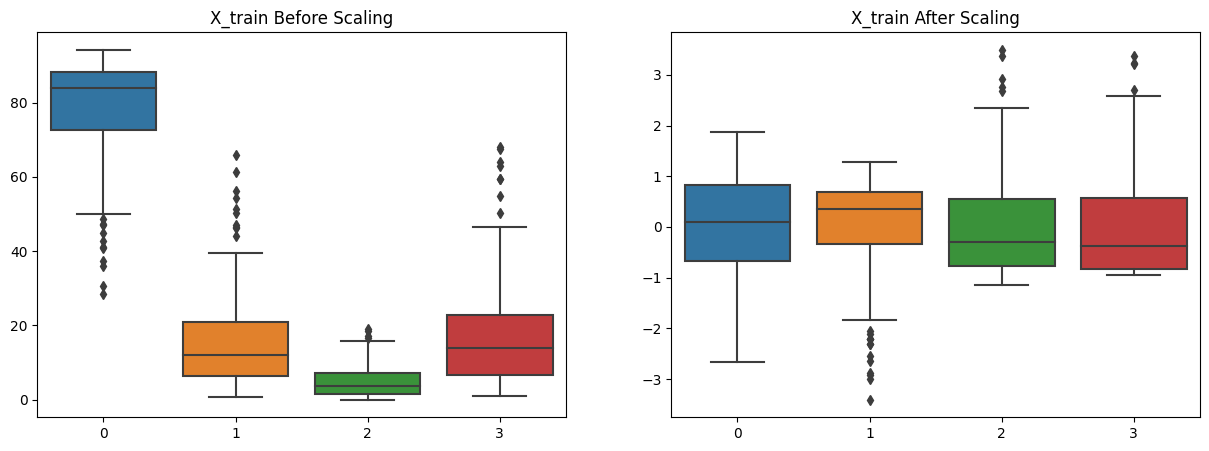

In [335]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train_fs)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

### Linear Model

In [313]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


#### Without feature selection

Mean absolute error 2.0974474169208124
R2 Score 0.5324063408765247


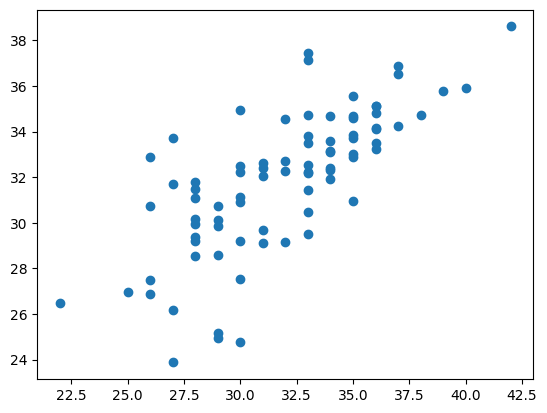

In [555]:
linreg=LinearRegression()
#feature scaling
X_train_scaled, X_test_scaled = scaling( X_train, X_test )
#model training
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
#scoring
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

##### Mutual information regresssion

Mean absolute error 2.131520793699547
R2 Score 0.5198741205877319


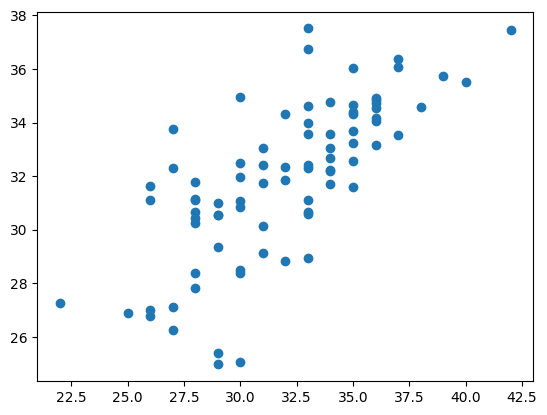

In [556]:
X_train_fs, X_test_fs, fs = select_numericals_mutual(X_train, y_train, X_test, k = 4)
#model
linreg=LinearRegression()
#feature scaling
X_train_scaled, X_test_scaled = scaling( X_train_fs, X_test_fs )
#model training
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
#scoring
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

#### f_regression

Mean absolute error 2.131520793699547
R2 Score 0.5198741205877319


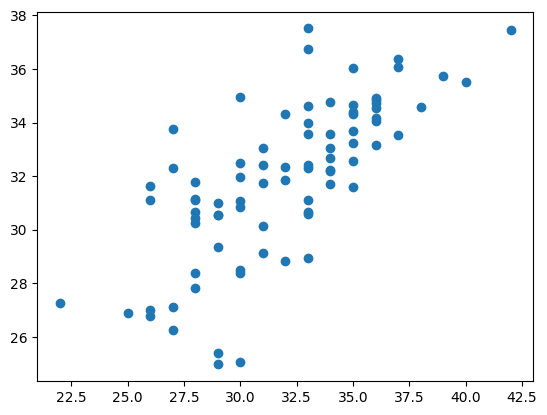

In [557]:
X_train_fs, X_test_fs, fs = select_numericals_reg(X_train, y_train, X_test, k = 4)
#model
linreg=LinearRegression()
#feature scaling
X_train_scaled, X_test_scaled = scaling( X_train_fs, X_test_fs )
#model training
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
#scoring
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

# Lasso

In [161]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

####  Mutual information regression

Mean absolute error 2.3377953749608755
R2 Score 0.44125728975504785


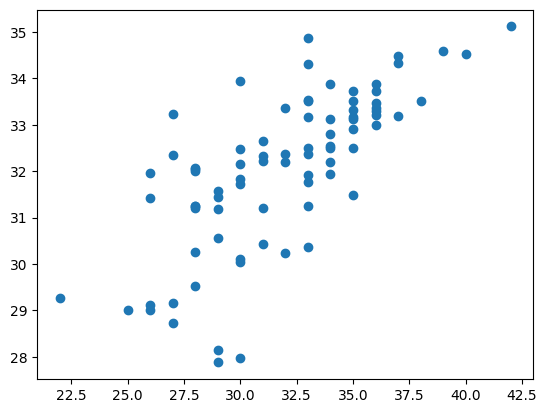

In [558]:
X_train_fs, X_test_fs, fs = select_numericals_mutual(X_train, y_train, X_test, k = 4)
#model
lasso=Lasso()
#feature scaling
X_train_scaled, X_test_scaled = scaling( X_train_fs, X_test_fs )
#model training
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
#scoring
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

#### f_regression

Mean absolute error 2.3377953749608755
R2 Score 0.44125728975504785


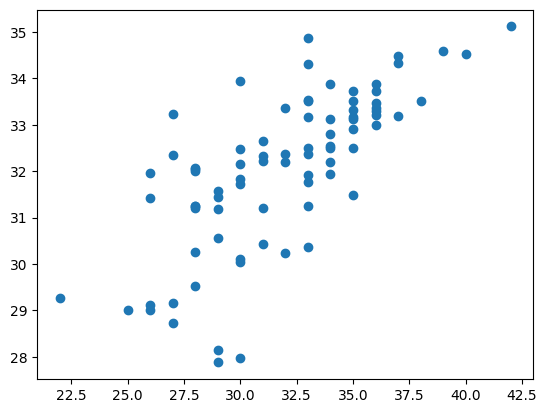

In [559]:
X_train_fs, X_test_fs, fs = select_numericals_reg(X_train, y_train, X_test, k = 4)
#model
lasso=Lasso()
#feature scaling
X_train_scaled, X_test_scaled = scaling( X_train_fs, X_test_fs )
#model training
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
#scoring
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

## Ridge

In [560]:
from sklearn.linear_model import Ridge

#### mutual information regression

Mean absolute error 2.130565207005117
R2 Score 0.5209198285785777


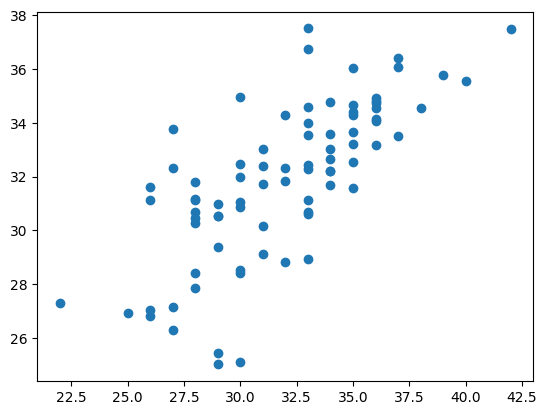

In [561]:
X_train_fs, X_test_fs, fs = select_numericals_mutual(X_train, y_train, X_test, k = 4)
ridge=Ridge()
#model training and prediction
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
#scoring
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

#### f_regression

Mean absolute error 2.130565207005117
R2 Score 0.5209198285785777


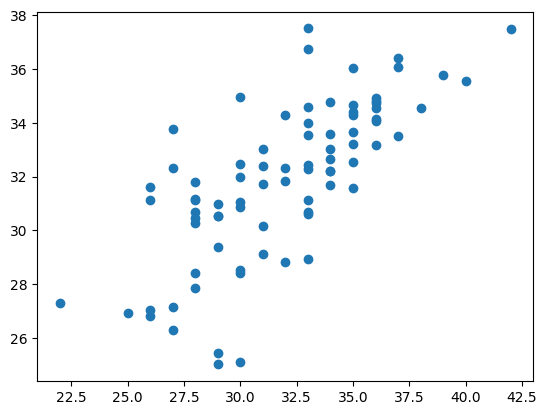

In [562]:
X_train_fs, X_test_fs, fs = select_numericals_reg(X_train, y_train, X_test, k = 4)
ridge=Ridge()
#model training and prediction
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
#scoring
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

# Elastic Net regression

#### Mutual information regression

In [563]:
from sklearn.linear_model import ElasticNet

Mean absolute error 2.2606100501343445
R2 Score 0.4752184908027235


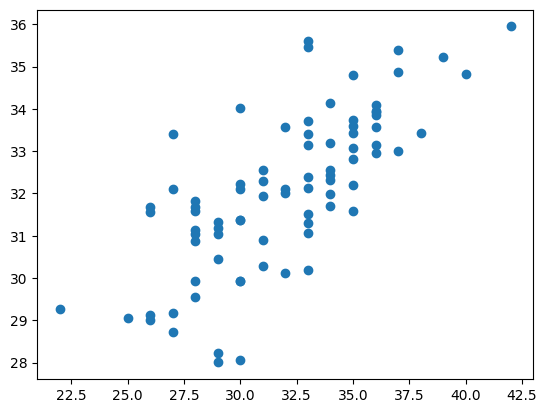

In [564]:
X_train_fs, X_test_fs, fs = select_numericals_mutual(X_train, y_train, X_test, k = 4)
#model
elastic=ElasticNet()
#model training and prediction
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
#scoring
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

#### f_regression

Mean absolute error 2.2606100501343445
R2 Score 0.4752184908027235


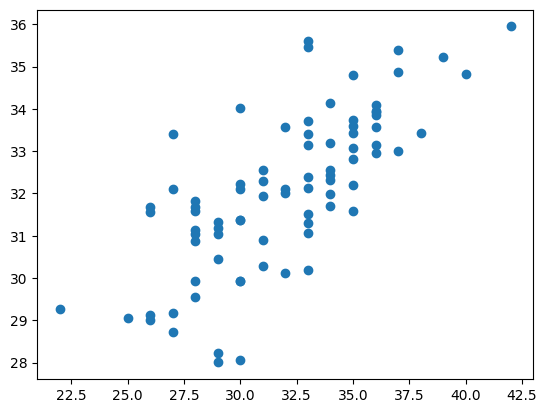

In [565]:
X_train_fs, X_test_fs, fs = select_numericals_reg(X_train, y_train, X_test, k = 4)
#model
elastic=ElasticNet()
#model training and prediction
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
#scoring
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)